<center><h1 style="background-color: #C6F3CD; border-radius: 10px; color: #FFFFFF; padding: 5px;">
Chi-Squared Test for Variance
 </h1><center/>

**Link to the article** : https://medium.com/ai-in-plain-english/chi-squared-test-for-variance-6736a121adde?sk=3673be6a12ac5bc6178c3bc8ec110f3c

## Chi Square Test (2 Tails)

In [1]:
import numpy as np
from scipy.stats import chi2
import matplotlib.pyplot as plt

In [2]:
weights = [498, 502, 499, 501, 500, 497, 503, 496, 504, 499]  # Example weights in mg
sample_variance = np.var(weights, ddof=1)  # Sample variance (unbiased)
n = len(weights)  # Sample size
hypothesized_variance = 10  # Hypothesized variance
# Chi-squared test statistic
chi_squared_stat = (n - 1) * sample_variance / hypothesized_variance
print(f'Chi-Squared Test is equal to: {chi_squared_stat}')

Chi-Squared Test is equal to: 6.090000000000001


In [3]:
df = n - 1
alpha = 0.05
chi2_critical_low = chi2.ppf(alpha / 2, df)
chi2_critical_high = chi2.ppf(1 - alpha / 2, df)
chi2_critical_low, chi2_critical_high

(2.700389499980358, 19.02276779864163)

In [4]:
if chi2_critical_low < chi_squared_stat < chi2_critical_high:
    print("Fail to reject the null hypothesis: variance matches the hypothesized value.")
else:
    print("Reject the null hypothesis: variance significantly differs from the hypothesized value.")

# Output test results
print(f"Chi-squared statistic: {chi_squared_stat:.4f}")
print(f"Chi-squared critical range: ({chi2_critical_low:.4f}, {chi2_critical_high:.4f})")

Fail to reject the null hypothesis: variance matches the hypothesized value.
Chi-squared statistic: 6.0900
Chi-squared critical range: (2.7004, 19.0228)


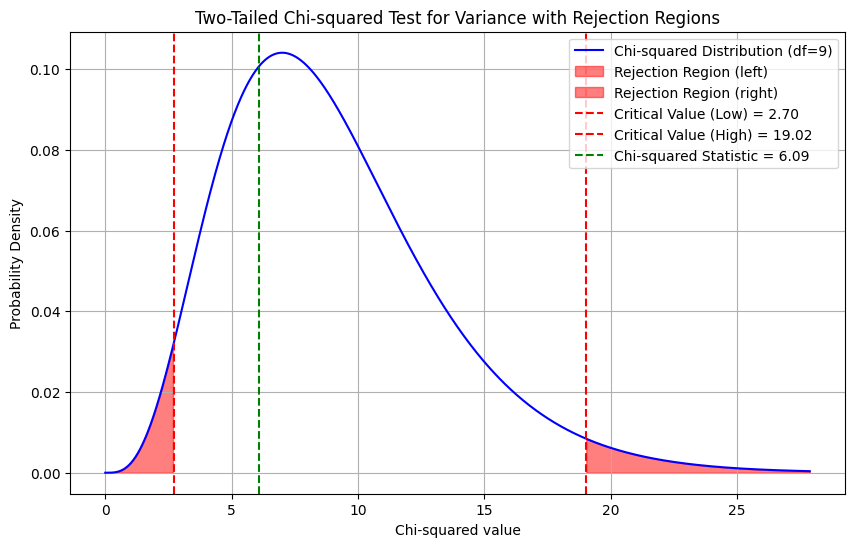

In [5]:
# Plotting the Chi-squared distribution and rejection regions
x = np.linspace(0, chi2.ppf(0.999, df), 1000)
pdf_values = chi2.pdf(x, df)

plt.figure(figsize=(10, 6))
plt.plot(x, pdf_values, label=f"Chi-squared Distribution (df={df})", color="blue")

# Shade the rejection regions
plt.fill_between(x, 0, pdf_values, where=(x <= chi2_critical_low), color="red", alpha=0.5, label="Rejection Region (left)")
plt.fill_between(x, 0, pdf_values, where=(x >= chi2_critical_high), color="red", alpha=0.5, label="Rejection Region (right)")

# Plot the critical values and test statistic
plt.axvline(chi2_critical_low, color="red", linestyle="--", label=f"Critical Value (Low) = {chi2_critical_low:.2f}")
plt.axvline(chi2_critical_high, color="red", linestyle="--", label=f"Critical Value (High) = {chi2_critical_high:.2f}")
plt.axvline(chi_squared_stat, color="green", linestyle="--", label=f"Chi-squared Statistic = {chi_squared_stat:.2f}")

# Labels and legend
plt.title("Two-Tailed Chi-squared Test for Variance with Rejection Regions")
plt.xlabel("Chi-squared value")
plt.ylabel("Probability Density")
plt.legend()
plt.grid()

plt.show()

---

## Chi Square Test (1 Tail)

In [6]:
n = 26
sample_variance = 3**2 
hypothesized_variance = 4**2  
alpha = 0.05

In [7]:
chi_squared_stat = (n - 1) * sample_variance / hypothesized_variance
chi_squared_stat

14.0625

In [8]:
df = n - 1
chi2_critical_lower = chi2.ppf(alpha, df)
chi2_critical_lower

14.61140763948331

In [9]:
result = (
    "Reject the null hypothesis: The variance is significantly less than the hypothesized value."
    if chi_squared_stat < chi2_critical_lower else
    "Fail to reject the null hypothesis: The variance is not significantly less than the hypothesized value."
)

chi_squared_stat, chi2_critical_lower, result

(14.0625,
 14.61140763948331,
 'Reject the null hypothesis: The variance is significantly less than the hypothesized value.')

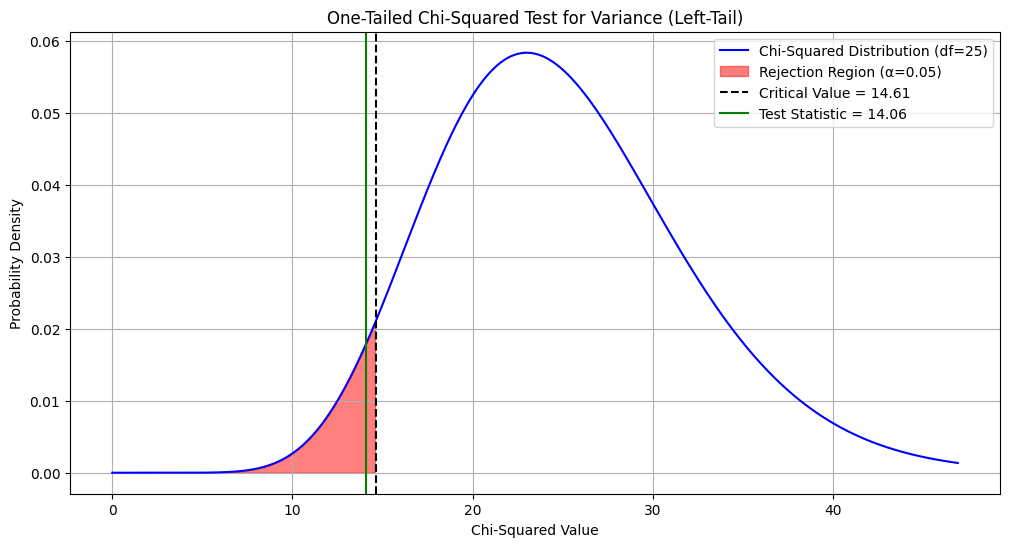

In [10]:
# X values for plotting the Chi-Squared distribution
x = np.linspace(0, chi2.ppf(0.995, df), 500)
y = chi2.pdf(x, df)

# Plotting the one-tailed Chi-Squared test
plt.figure(figsize=(12, 6))
plt.plot(x, y, label='Chi-Squared Distribution (df=25)', color='blue')

# Shading the left rejection region
plt.fill_between(x, 0, y, where=(x <= chi2_critical_lower), color='red', alpha=0.5, label="Rejection Region (α=0.05)")

# Marking the critical value and test statistic
plt.axvline(chi2_critical_lower , color='black', linestyle='--', label=f'Critical Value = {chi2_critical_lower :.2f}')
plt.axvline(chi_squared_stat, color='green', linestyle='-', label=f'Test Statistic = {chi_squared_stat:.2f}')

# Plot settings
plt.title("One-Tailed Chi-Squared Test for Variance (Left-Tail)")
plt.xlabel("Chi-Squared Value")
plt.ylabel("Probability Density")
plt.legend(loc="upper right")
plt.grid(True)
plt.show()